# Credit Card Fraud Detection: Model Building and Comparison
This notebook implements two machine learning models (Logistic Regression and Random Forest) for credit card fraud detection using the Kaggle dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cc.csv')
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Preprocessing the Data
### Scaling Features
The `Amount` and `Time` features will be scaled, and SMOTE will be applied to balance the dataset.

In [7]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Set to the number of logical cores (e.g., 4)


X = df.drop(columns=['Class'])
y = df['Class']
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)


Training set shape: (454904, 30)
Test set shape: (113726, 30)


## Logistic Regression Model
Logistic regression is used as the baseline model for the classification problem.

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
print(f'Logistic Regression - Accuracy: {accuracy_logreg}, Precision: {precision_logreg}, Recall: {recall_logreg}, F1-Score: {f1_logreg}')


Logistic Regression - Accuracy: 0.9489035049153228, Precision: 0.9743737135863821, Recall: 0.9222655153046897, F1-Score: 0.9476038050583833


## Random Forest Classifier
Random Forest is a more complex model that often performs well in classification tasks with imbalanced data.

In [9]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f'Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-Score: {f1_rf}')

Random Forest - Accuracy: 0.999903276295658, Precision: 0.9998069735202766, Recall: 1.0, F1-Score: 0.9999034774444338


## Model Comparison
The performance of Logistic Regression and Random Forest models is compared using accuracy, precision, recall, and F1-score.

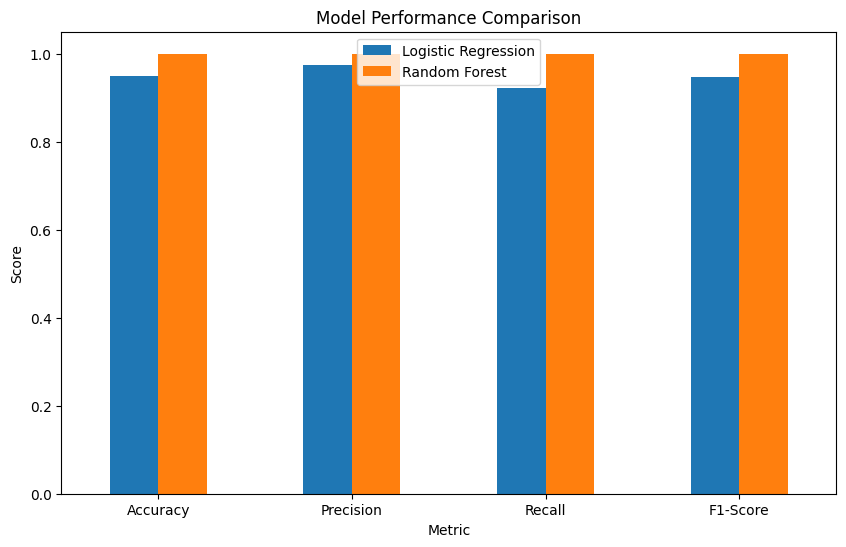

In [10]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
logreg_metrics = [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg]
rf_metrics = [accuracy_rf, precision_rf, recall_rf, f1_rf]
metrics_df = pd.DataFrame({'Metric': labels, 'Logistic Regression': logreg_metrics, 'Random Forest': rf_metrics})
metrics_df.plot(x='Metric', kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()